<a href="https://colab.research.google.com/github/ankitaggarwal64/Agricultural-Equipment-Sales-Forecasting/blob/main/Data_Understanding(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Undestanding - Data Exploration and Visualisation :**
In this notebook, Following will be done:


*   Exporation of data and duplicates
*   Treatment of missing values
*   Exploration of Sales data and Indices







In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#import sales and indices combined data
combined_sales_ind = pd.read_csv("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Output_files/combined_sales_ind.csv",parse_dates=['Time'], index_col='Time')

# displaying data
display(combined_sales_ind)

#Size of data - Sales and 25 Indices
print(combined_sales_ind.shape)

,Sales,livestock1,livestock2,livestock3,livestock4,livestock5,livestock6,corn1,corn2,corn3,corn4,wheat1,wheat2,wheat3,wheat4,wheat5,hay1,hay2,dairy1,dairy2,dairy3,dairy4,dairy5,dairy6,BRLCSPOT.D7,STRTXOK.D7,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,NaN,79.06,NaN,NaN,NaN,NaN,239.83,229.41,2.31,2.69,402.53,396.76,429.99,3.71,NaN,84.9,93.3,NaN,NaN,NaN,NaN,NaN,15.5,NaN,79.06,46.26,NaN,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5
1990-02-28,467,NaN,79.04,NaN,NaN,NaN,NaN,241.59,234.97,2.32,2.70,392.28,386.30,412.67,3.56,NaN,85.7,95.2,NaN,NaN,NaN,NaN,NaN,14.5,NaN,79.04,46.26,NaN,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7
1990-03-31,467,NaN,79.16,NaN,NaN,NaN,NaN,250.58,244.68,2.37,2.72,387.13,377.33,403.26,3.48,NaN,87.5,96.7,NaN,NaN,NaN,NaN,NaN,13.9,NaN,79.16,46.26,NaN,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6
1990-04-30,593,NaN,79.89,NaN,NaN,NaN,NaN,273.49,263.98,2.51,3.01,383.06,367.06,412.49,3.49,NaN,95.0,103.0,NaN,NaN,NaN,NaN,NaN,13.4,NaN,79.89,46.26,NaN,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3
1990-05-31,866,NaN,78.28,NaN,NaN,NaN,NaN,284.34,273.86,2.62,3.08,371.44,365.44,389.52,3.40,NaN,96.0,104.0,NaN,NaN,NaN,NaN,NaN,13.5,NaN,78.28,46.26,NaN,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,0.80,116.55,116.91,151.20,48.12,47.38,323.04,307.93,3.21,3.82,398.89,407.10,414.74,3.67,4.06,131.0,138.0,0.28,0.86,15.21,16.30,14.65,17.2,0.80,116.55,65.86,2192.5,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8
2016-09-30,200,0.78,106.08,106.22,138.38,43.36,42.83,328.90,320.25,3.22,3.78,375.02,390.98,424.61,3.49,4.10,129.0,137.0,0.30,0.88,14.66,16.39,14.25,17.4,0.78,106.08,65.86,2192.5,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5
2016-10-31,611,0.71,100.37,101.76,121.82,37.07,30.84,349.49,326.23,3.29,3.88,381.28,408.77,440.15,3.68,4.14,131.0,135.0,0.33,0.92,14.09,14.82,13.66,16.7,0.71,100.37,65.86,2197.2,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8


(324, 36)


For understanding the indices provided, we will look at the description of the names of indices name provided in dictionary file

In [ ]:
# import dictionary file
Indices_description = pd.ExcelFile("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Raw Data/Dictionary.xlsx")

# Looking at the sheets avaialble in excel file
print(Indices_description.sheet_names) 

['Dictionary']


In [ ]:
# Creating a dictionary of sheets in workbook
Indices_dict = {sheet: Indices_description.parse(sheet) for sheet in Indices_description.sheet_names}

In [ ]:
# Extracting the Dictionary sheet from the workbook
Indices_desc = Indices_dict['Dictionary']
print(type(Indices_desc))
print(Indices_desc.shape)
display(Indices_desc)

<class 'pandas.core.frame.DataFrame'>
(35, 3)


,Indices_Name,Description,Indices_type
0,livestock1,"Broilers, Composite Average, Spot Price - Unit...",Commodity Prices
1,livestock2,"Live FOB Basis, Beef Breeds, Steers, 65% to 80...",Commodity Prices
2,livestock3,"Cattle Prices, Steers, Choice, 11-13 Centum We...",Commodity Prices
3,livestock4,"Feeder Cattle, Steers, Medium No. 1, 600-650 ...",Commodity Prices
4,livestock5,"Hog Prices, Barrows and Gilts, 6 Markets ($/CWT)",Commodity Prices
5,livestock6,"Hog Prices, Sows, No. 1-3 - Iowa/South Minneso...",Commodity Prices
6,corn1,"Corn Futures, 1st Expiration Nearby, Settlemen...",Commodity Prices
7,corn2,North Central and South Central Illinois Corn ...,Commodity Prices
8,corn3,"Producer Prices Received, Field Crops, Corn ($...",Commodity Prices
9,corn4,"Corn, No. 2 Yellow, Gulf Ports, US ($/bu)",Commodity Prices


**Observations from Indices description:**

1.   There are two types of indices - Commodity prices(25) and Economic Indices(10)
2.   Some of names of the commodity prices indices are too general or too specific, therefore those can be changed for out better analysis. 



In [ ]:
# Creating a dictionary for new column names
new_column_names = {"livestock1" : "livestock1_broilers","livestock2" : "livestock2_beef_steers",
                   "livestock3" : "livestock3_steers","livestock4" : "livestock4_steers","livestock5" : "livestock5_hog",
                   "livestock6" : "livestock6_hog","BRLCSPOT.D7" : "BRLCS_broilers","STRTXOK.D7" : "STRTXOK_beef_steers" }

# Rename Columns
clean_combined_sales_ind = combined_sales_ind.rename(columns = new_column_names)
display(clean_combined_sales_ind.head())

,Sales,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn2,corn3,corn4,wheat1,wheat2,wheat3,wheat4,wheat5,hay1,hay2,dairy1,dairy2,dairy3,dairy4,dairy5,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,NaN,79.06,NaN,NaN,NaN,NaN,239.83,229.41,2.31,2.69,402.53,396.76,429.99,3.71,NaN,84.9,93.3,NaN,NaN,NaN,NaN,NaN,15.5,NaN,79.06,46.26,NaN,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5
1990-02-28,467,NaN,79.04,NaN,NaN,NaN,NaN,241.59,234.97,2.32,2.70,392.28,386.30,412.67,3.56,NaN,85.7,95.2,NaN,NaN,NaN,NaN,NaN,14.5,NaN,79.04,46.26,NaN,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7
1990-03-31,467,NaN,79.16,NaN,NaN,NaN,NaN,250.58,244.68,2.37,2.72,387.13,377.33,403.26,3.48,NaN,87.5,96.7,NaN,NaN,NaN,NaN,NaN,13.9,NaN,79.16,46.26,NaN,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6
1990-04-30,593,NaN,79.89,NaN,NaN,NaN,NaN,273.49,263.98,2.51,3.01,383.06,367.06,412.49,3.49,NaN,95.0,103.0,NaN,NaN,NaN,NaN,NaN,13.4,NaN,79.89,46.26,NaN,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3
1990-05-31,866,NaN,78.28,NaN,NaN,NaN,NaN,284.34,273.86,2.62,3.08,371.44,365.44,389.52,3.40,NaN,96.0,104.0,NaN,NaN,NaN,NaN,NaN,13.5,NaN,78.28,46.26,NaN,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3


In [ ]:
#Checking datatypes
clean_combined_sales_ind.dtypes

Sales                       int64
livestock1_broilers       float64
livestock2_beef_steers    float64
livestock3_steers         float64
livestock4_steers         float64
livestock5_hog            float64
livestock6_hog            float64
corn1                     float64
corn2                     float64
corn3                     float64
corn4                     float64
wheat1                    float64
wheat2                    float64
wheat3                    float64
wheat4                    float64
wheat5                    float64
hay1                      float64
hay2                      float64
dairy1                    float64
dairy2                    float64
dairy3                    float64
dairy4                    float64
dairy5                    float64
dairy6                    float64
BRLCS_broilers            float64
STRTXOK_beef_steers       float64
FarmIncome                float64
Non-ResidentialInvest     float64
HOUST                     float64
RealGDP       

In [ ]:
#Checking summary statistics
clean_combined_sales_ind.describe()

#Observation : based on count of values in each column, we can clealy see there are missing values in many columns

,Sales,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn2,corn3,corn4,wheat1,wheat2,wheat3,wheat4,wheat5,hay1,hay2,dairy1,dairy2,dairy3,dairy4,dairy5,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
count,324.000000,310.000000,321.000000,224.000000,224.000000,224.000000,225.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,289.000000,324.000000,324.000000,220.000000,220.000000,258.000000,277.000000,264.000000,324.000000,310.000000,321.000000,324.000000,216.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,439.416667,0.700097,88.387321,96.881786,126.124330,49.478438,39.450267,333.574846,321.146605,3.154938,3.715309,422.529444,443.689877,509.611636,4.420432,5.367232,110.327469,118.854321,0.352045,1.136773,14.837558,14.336968,14.083485,15.342593,0.700097,88.387321,65.728519,1804.805556,1306.916667,12960.656481,6.049383,6.022191,1.872284,6.392346,6.133117,90.493395
std,221.052834,0.154801,25.070336,27.535873,43.602165,12.668950,15.210220,146.908376,149.931396,1.395110,1.594009,165.182594,172.665163,200.103259,1.729261,1.998499,34.938395,40.840729,0.170473,0.345275,3.449710,3.425877,3.448345,3.237528,0.154801,25.070336,21.973514,234.066304,423.626562,2415.163914,1.546703,2.313083,0.343634,1.785735,0.871779,26.365347
min,102.000000,0.450000,58.080000,58.280000,70.370000,16.620000,7.800000,178.290000,148.830000,1.520000,1.910000,194.360000,235.860000,267.670000,2.220000,2.770000,68.200000,71.000000,0.140000,0.730000,10.250000,8.570000,9.450000,11.000000,0.450000,58.080000,39.660000,1459.000000,478.000000,8865.600000,3.800000,3.250000,1.280000,3.350000,4.570000,25.300000
25%,263.000000,0.570000,69.330000,77.435000,95.867500,40.535000,28.320000,226.122500,215.297500,2.140000,2.557500,304.467500,315.277500,360.145000,3.207500,3.860000,83.975000,89.200000,0.220000,0.880000,12.250000,11.610000,11.607500,12.800000,0.570000,69.330000,47.720000,1609.825000,1004.000000,10711.025000,4.900000,3.250000,1.580000,4.887500,5.497500,68.272500
50%,397.000000,0.655000,80.460000,89.065000,114.275000,48.420000,38.440000,268.420000,262.095000,2.555000,2.965000,371.335000,384.370000,435.100000,3.750000,4.750000,96.550000,104.000000,0.290000,1.010000,14.085000,13.800000,13.235000,14.500000,0.655000,80.460000,58.950000,1740.850000,1340.000000,13262.250000,5.600000,6.000000,1.840000,6.390000,6.120000,93.080000
75%,571.000000,0.810000,98.110000,119.402500,145.387500,57.680000,47.380000,382.970000,365.237500,3.672500,4.310000,499.312500,527.990000,621.295000,5.425000,6.500000,129.000000,137.000000,0.480000,1.312500,16.597500,16.330000,15.765000,17.100000,0.810000,98.110000,79.260000,1989.350000,1604.250000,14903.325000,6.900000,8.250000,2.172500,7.680000,6.780000,106.550000
max,1498.000000,1.150000,167.500000,170.040000,262.340000,95.170000,93.440000,803.540000,815.900000,7.630000,8.460000,1039.530000,1096.330000,1229.330000,10.500000,11.990000,196.000000,227.000000,0.780000,2.090000,26.110000,24.600000,23.890000,25.700000,1.150000,167.500000,123.730000,2217.500000,2273.000000,16813.300000,10.000000,10.110000,2.430000,10.480000,7.730000,144.700000


**Exploration of Indices and Missing Values**

In [ ]:
# Importing data table
%load_ext google.colab.data_table
from google.colab import data_table

In [ ]:
#Creating a copy of clean_combined_sales_ind
clean_combined_sales_ind_copy = clean_combined_sales_ind.copy()

# Checking rows with missing values
clean_combined_sales_ind_copy["sum"] = clean_combined_sales_ind_copy.isnull().sum(axis=1)

# Columns with atleast one missing value
miss_val_columns = clean_combined_sales_ind_copy.loc[:,clean_combined_sales_ind_copy.isnull().any()].columns
print(miss_val_columns)

In [ ]:
# Looking at table with columns having missing values
miss_val_col_data = clean_combined_sales_ind_copy[list(miss_val_columns)][clean_combined_sales_ind_copy["sum"]>0]

# Visualising data table
data_table.DataTable(miss_val_col_data , include_index= True, num_rows_per_page=10)

,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,wheat5,dairy1,dairy2,dairy3,dairy4,dairy5,BRLCS_broilers,STRTXOK_beef_steers,Non-ResidentialInvest
Time,,,,,,,,,,,,,,,
1990-01-31,NaN,79.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.06,NaN
1990-02-28,NaN,79.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.04,NaN
1990-03-31,NaN,79.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.16,NaN
1990-04-30,NaN,79.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.89,NaN
1990-05-31,NaN,78.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-11-30,0.64,61.88,61.81,71.99,17.66,11.13,3.54,0.24,1.07,15.40,16.84,14.87,0.64,61.88,NaN
1998-12-31,0.60,59.44,59.36,73.33,19.95,7.80,3.44,0.24,1.09,16.34,17.34,13.44,0.60,59.44,NaN
2013-10-31,0.92,NaN,130.09,169.87,64.95,65.09,8.85,0.57,1.84,20.56,18.22,20.17,0.92,NaN,2076.3


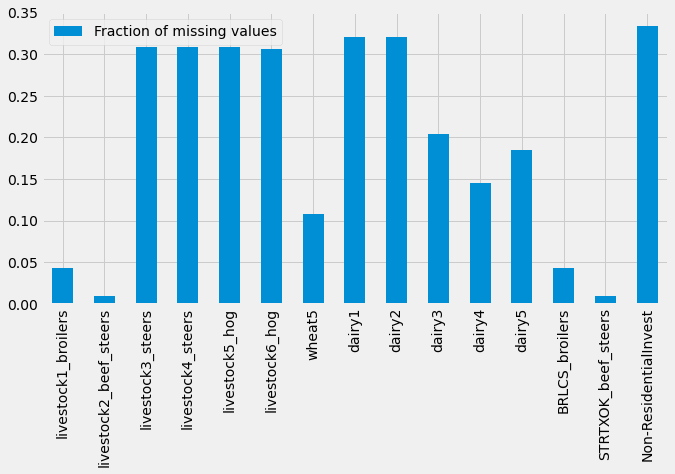

In [ ]:
#Fraction of missing values in columns with missing values
fract_miss_col = pd.DataFrame(clean_combined_sales_ind_copy[list(miss_val_columns)].isnull().mean())
fract_miss_col.columns = ["Fraction of missing values"]

#Ploting fraction of missing values
fract_miss_col.plot.bar(figsize= (10,5))

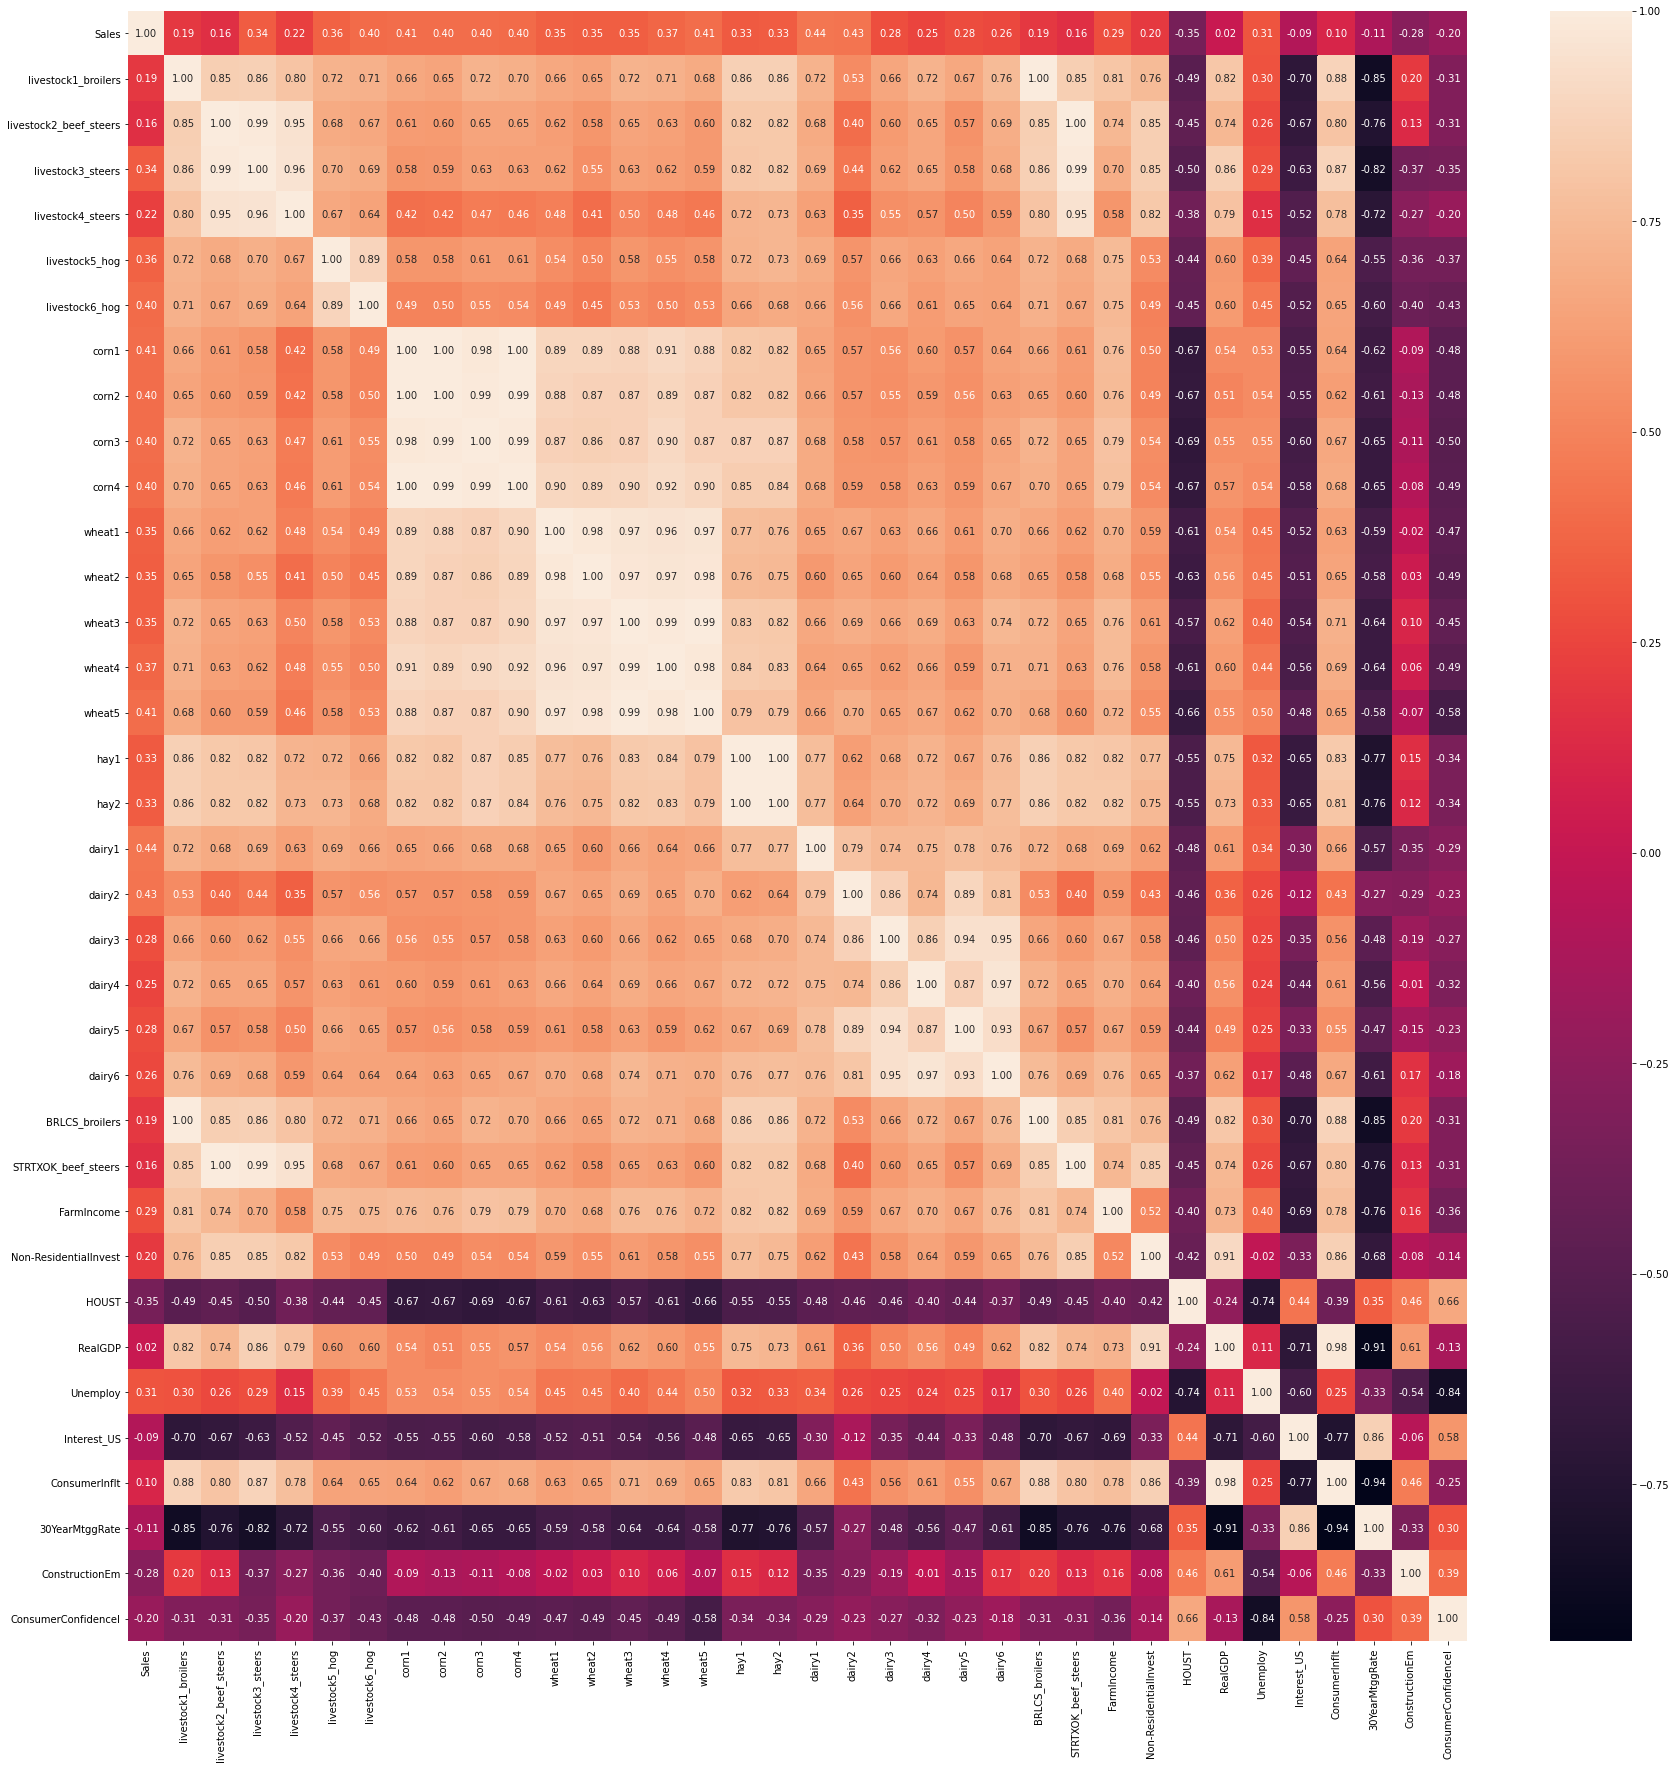

In [ ]:
# Plotting correlation heat map
fig, ax = plt.subplots(figsize=(30,30))  
sns.heatmap(clean_combined_sales_ind.corr(),annot=True,fmt =".2f")

Observations from correlation map:
*   Some variables have perfect correlation between them. They might be duplicates or representing exaclty same information




In [ ]:
# Columns with perfect correlation 
clean_combined_sales_ind.columns[(clean_combined_sales_ind.corr()==1).sum()>1]

Index(['livestock1_broilers', 'livestock2_beef_steers', 'BRLCS_broilers',
       'STRTXOK_beef_steers'],
      dtype='object')

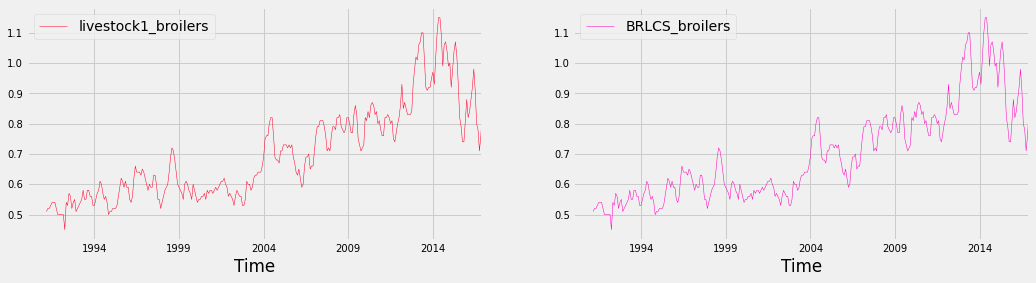

In [ ]:
# Ploting livestock1_broilers and BRLCS_broilers
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["livestock1_broilers","BRLCS_broilers"]].plot(subplots=True,linewidth=0.5,layout =(1,2),sharex=False,sharey=False,colormap = "gist_rainbow", figsize=(16,4),fontsize=10)
plt.show()

#Observation : livestock1_broilers and BRLCS_broilers are duplicates, therefore one of these variables can be dropped. We will remove livestock1_broilers from our data

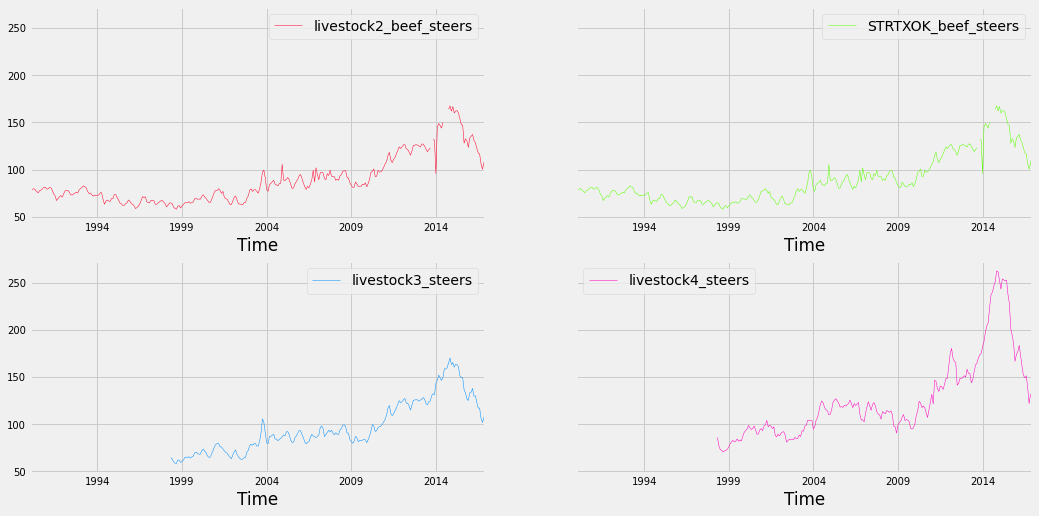

In [ ]:
# Ploting livestock2_beef_steers, STRTXOK_beef_steers,livestock3_steer,livestock4_steer in seperate plots
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["livestock2_beef_steers","STRTXOK_beef_steers","livestock3_steers","livestock4_steers"]].plot(subplots= True,linewidth=0.5,layout =(2,2),sharex=False,sharey=True,colormap = "gist_rainbow", figsize=(16,8),fontsize=10)

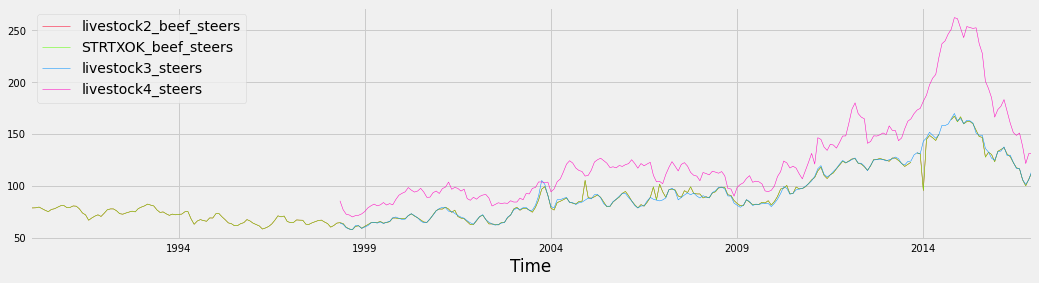

In [ ]:
# Ploting livestock2_beef_steers, STRTXOK_beef_steers,livestock3_steer,livestock4_steer in single plot
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["livestock2_beef_steers","STRTXOK_beef_steers","livestock3_steers","livestock4_steers"]].plot(subplots= False,linewidth=0.5,sharex=False,sharey=True,colormap = "gist_rainbow", figsize=(16,4),fontsize=10)
plt.show()

#Observation : livestock2_beef_steers, STRTXOK_beef_steers are exactly same and are duplicates, therefore one of them can be removed. We will remove livestock2_beef_steers.
#Observation : livestock3_steers seemns to be almost perfectly correlated to livestock2_beef_steers and STRTXOK_beef_steers. livestock3_steers can be used to fill out missing values in ivestock2_beef_steers/STRTXOK_beef_steers

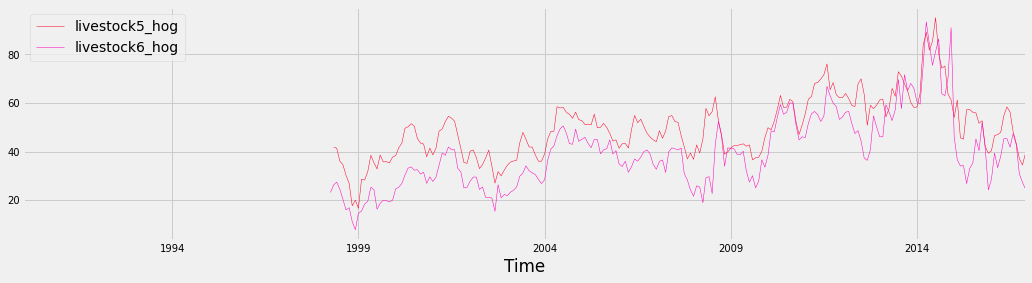

In [ ]:
# Ploting livestock5_hog & livestock6_hog indices on same plot

plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["livestock5_hog","livestock6_hog"]].plot(subplots= False,linewidth=0.5,layout =(2,2),sharex=False,sharey=False,colormap = "gist_rainbow", figsize=(16,4),fontsize=10)

#Observation : Both hog indices have missing values for initial 7-8 years and both are high positive correlation

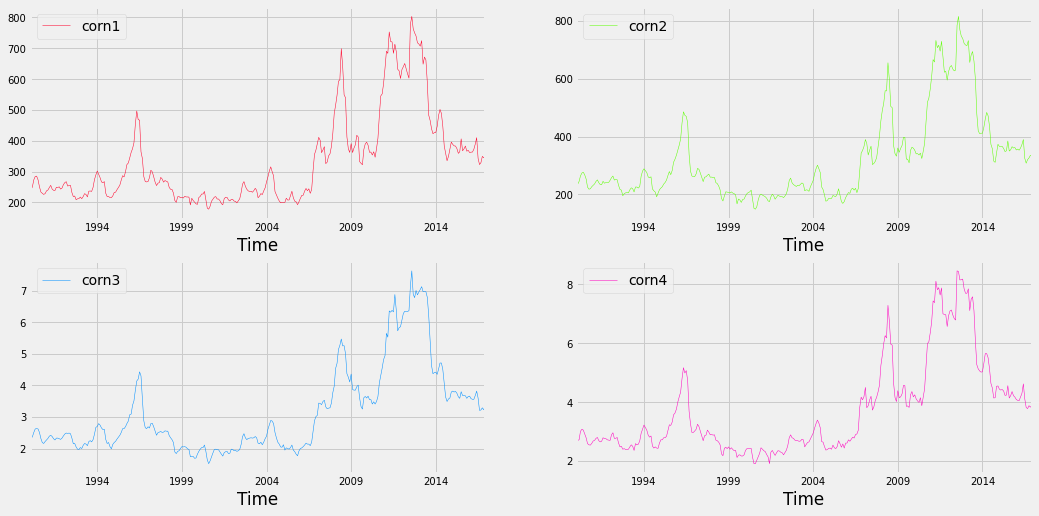

In [ ]:
# Ploting all 4 corn indices in seperate plots
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["corn1","corn2","corn3","corn4"]].plot(subplots= True,linewidth=0.5,layout =(2,2),sharex=False,sharey=False,colormap = "gist_rainbow", figsize=(16,8),fontsize=10)

#Observation : Corn1, Corn2 and Corn4 seems to be perfectly correlated and two of them can be removed . We will remove Corn2 & Corn4 from our table  and we will keep corn1 & corn3

correlation between all five wheat indices:


,wheat1,wheat2,wheat3,wheat4,wheat5
wheat1,1.000000,0.983777,0.966567,0.955607,0.966186
wheat2,0.983777,1.000000,0.973827,0.968316,0.975263
wheat3,0.966567,0.973827,1.000000,0.985507,0.994178
wheat4,0.955607,0.968316,0.985507,1.000000,0.980796
wheat5,0.966186,0.975263,0.994178,0.980796,1.000000




Correlation between hay1 & hay2: 0.9969536593968987


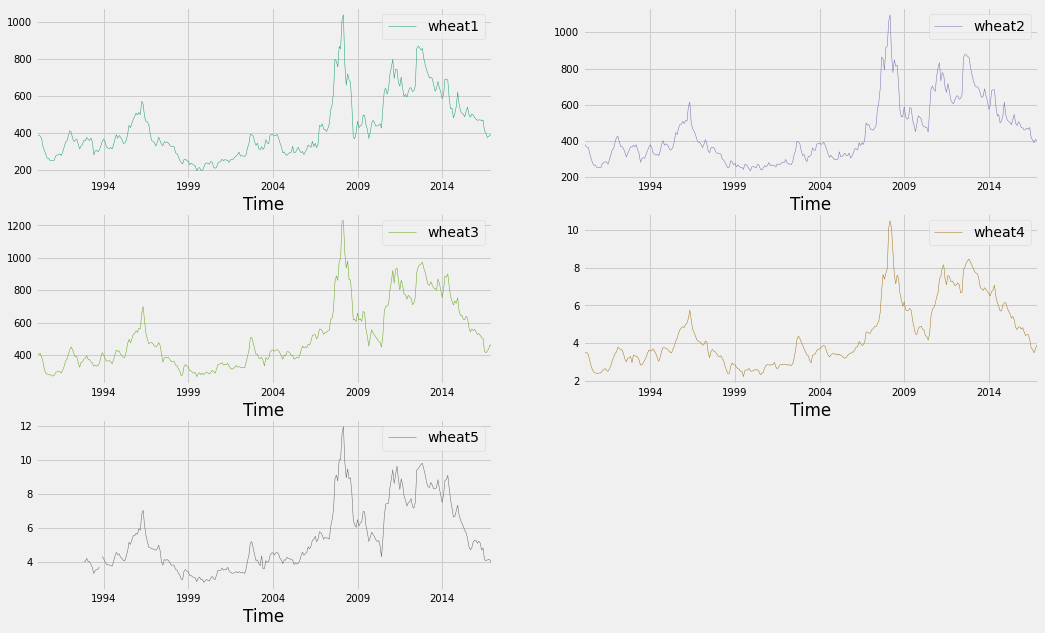

In [ ]:
# correlation between all five wheat indices
print ("correlation between all five wheat indices:" )
display(clean_combined_sales_ind[["wheat1","wheat2","wheat3","wheat4","wheat5"]].corr())
print("\n")

# Ploting all five wheat indices on seperate plots
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["wheat1","wheat2","wheat3","wheat4","wheat5"]].plot(subplots= True,linewidth=0.5,layout =(3,2),sharex=False,sharey=False,colormap = "Dark2", figsize=(16,10),fontsize=10)
plt.show()
#Observation : Though all are strongly correlated, but wheat3 and wheat5 are almost perfectly correlated, therfore we will remove wheat5 which have missing values as well

Correlation between hay1 & hay2: 0.9969536593968987




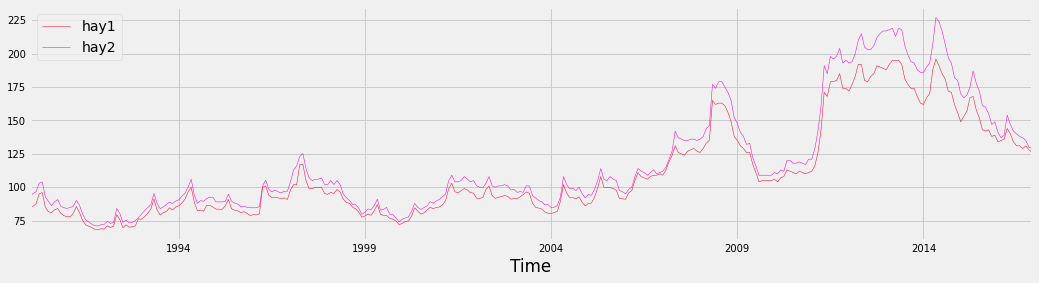

In [ ]:
# correlation between hay1 & hay2
print("Correlation between hay1 & hay2:",clean_combined_sales_ind[["hay1","hay2"]].corr().iloc[0,1])
print("\n")

# Ploting hay1 & hay2 indices on same plot
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["hay1","hay2"]].plot(subplots= False,linewidth=0.5,layout =(2,2),sharex=False,sharey=False,colormap = "gist_rainbow", figsize=(16,4),fontsize=10)

#Observation : Both hay indices seems to be perfectly correlated and has corretion of 0.996. One of them can be removed. we will remove hay1

Correlation between all six dairy indices:


,dairy1,dairy2,dairy3,dairy4,dairy5,dairy6
dairy1,1.000000,0.790432,0.744431,0.745179,0.776387,0.762165
dairy2,0.790432,1.000000,0.864466,0.740617,0.889111,0.809070
dairy3,0.744431,0.864466,1.000000,0.860978,0.941296,0.945903
dairy4,0.745179,0.740617,0.860978,1.000000,0.871223,0.967362
dairy5,0.776387,0.889111,0.941296,0.871223,1.000000,0.928384
dairy6,0.762165,0.809070,0.945903,0.967362,0.928384,1.000000


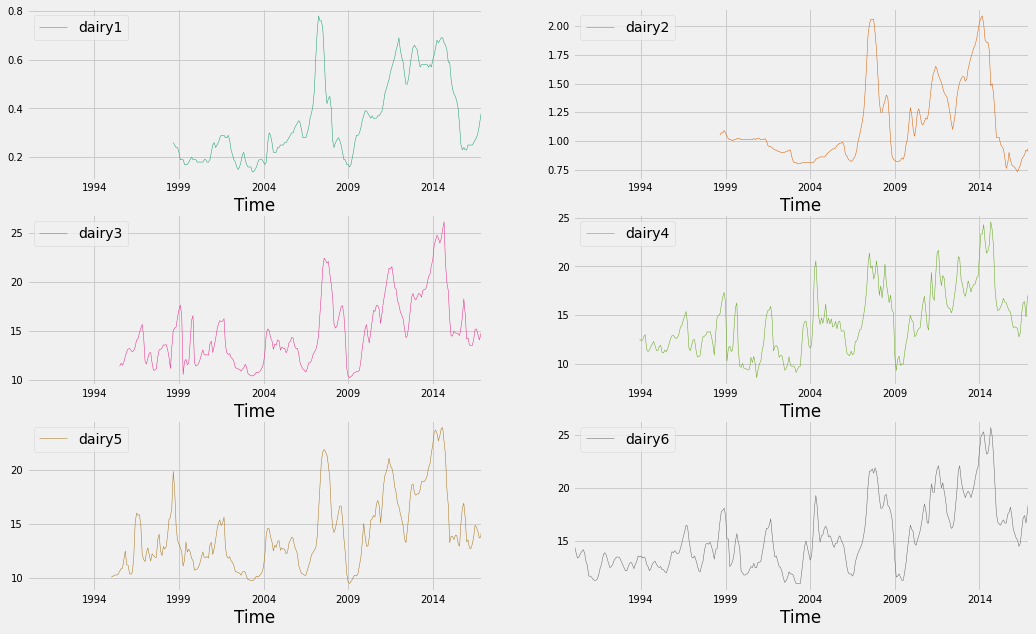

In [ ]:
# correlation between all Six dairy indices
print ("Correlation between all six dairy indices:" )
display(clean_combined_sales_ind[["dairy1","dairy2","dairy3","dairy4","dairy5","dairy6"]].corr())
print("\n")

# Ploting all Six dairy indices on seperate plots
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["dairy1","dairy2","dairy3","dairy4","dairy5","dairy6"]].plot(subplots= True,linewidth=0.5,layout =(3,2),sharex=False,sharey=False,colormap = "Dark2", figsize=(16,10),fontsize=10)

#Observation : Though all are strongly correlated, but wheat3 and wheat5 are almost perfectly correlated, therfore we will remove wheat5 which have missing values as well


Correlation between DP,ConsumerInflt,30YearMtggRate,Non-ResidentialInvest:


,RealGDP,ConsumerInflt,30YearMtggRate,Non-ResidentialInvest
RealGDP,1.000000,0.981823,-0.907326,0.908044
ConsumerInflt,0.981823,1.000000,-0.936643,0.857514
30YearMtggRate,-0.907326,-0.936643,1.000000,-0.675783
Non-ResidentialInvest,0.908044,0.857514,-0.675783,1.000000


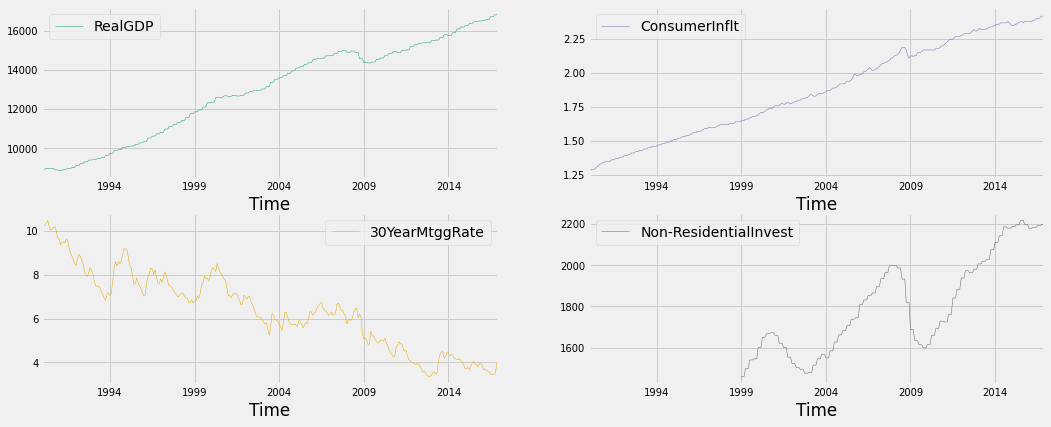

In [ ]:
# correlation between all Six dairy indices
print ("Correlation between DP,ConsumerInflt,30YearMtggRate,Non-ResidentialInvest:" )
display(clean_combined_sales_ind[["RealGDP","ConsumerInflt","30YearMtggRate","Non-ResidentialInvest"]].corr())
print("\n")

# Ploting GDP,ConsumerInflt,30YearMtggRate,Non-ResidentialInvest
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["RealGDP","ConsumerInflt","30YearMtggRate","Non-ResidentialInvest"]].plot(subplots= True,linewidth=0.5,layout =(3,2),sharex=False,sharey=False,colormap = "Dark2", figsize=(16,10),fontsize=10)
plt.show()

#Observation1 : We can see that GDP and Consumer Inflation are highly positively correlated
#Observation2 : We can see that GDP and 30yearMortgage rate  are highly negatively correlated correlated
#Observation3 : There are missing values in Non-ResidentialInvest index and it's positively correlated to RealGDP